In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [523]:
df=pd.read_csv('BIKE DETAILS.csv')

In [524]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
# (Show the shape and column names as well.)
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [525]:
df.shape

(1061, 7)

In [526]:
df.columns.to_list()

['name',
 'selling_price',
 'year',
 'seller_type',
 'owner',
 'km_driven',
 'ex_showroom_price']

In [527]:
# Question 2: Check for missing values in all columns and describe your approach for handling them.
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


### The Column  ex_showroom_price has 435 values
- Each bike has different price range and hence will have different ex_showroom_price
- We are creating the different categories of price range and calculate the average ex_showroom_price in each range and map to the data


In [528]:
df["selling_price"].min()

5000

In [529]:
df["price_range"] = pd.cut(
    df["selling_price"],
    bins=[4999, 20000, 50000, 100000, 150000,200000,np.inf],
    labels=["20k", "50k", "100k", "150k", "200k","200k+"],
    include_lowest=True
)

In [530]:
d=df.groupby(df["price_range"])["ex_showroom_price"].mean().to_dict()
d

{'20k': 57251.12,
 '50k': 64616.15652173913,
 '100k': 88114.46153846153,
 '150k': 166248.68,
 '200k': 178590.29411764705,
 '200k+': 601587.5}

In [531]:
df["new_ex_showroom_price"]=df["price_range"].map(d)

In [532]:
df["new_ex_showroom_price"]=df["new_ex_showroom_price"].astype('int')

In [533]:
df["new_ex_showroom_price"].unique()

array([178590,  64616, 166248,  88114,  57251, 601587])

In [534]:
df.drop("ex_showroom_price",axis=1,inplace=True)

In [535]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
price_range,0
new_ex_showroom_price,0


In [536]:
df[(df["selling_price"]>0) & (df["selling_price"]<100000)]

,name,selling_price,year,seller_type,owner,km_driven,price_range,new_ex_showroom_price
1,Honda Dio,45000,2017,Individual,1st owner,5650,50k,64616
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,100k,88114
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,20k,57251
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,20k,57251
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,100k,88114
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,20k,57251
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,20k,57251
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,20k,57251
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,20k,57251


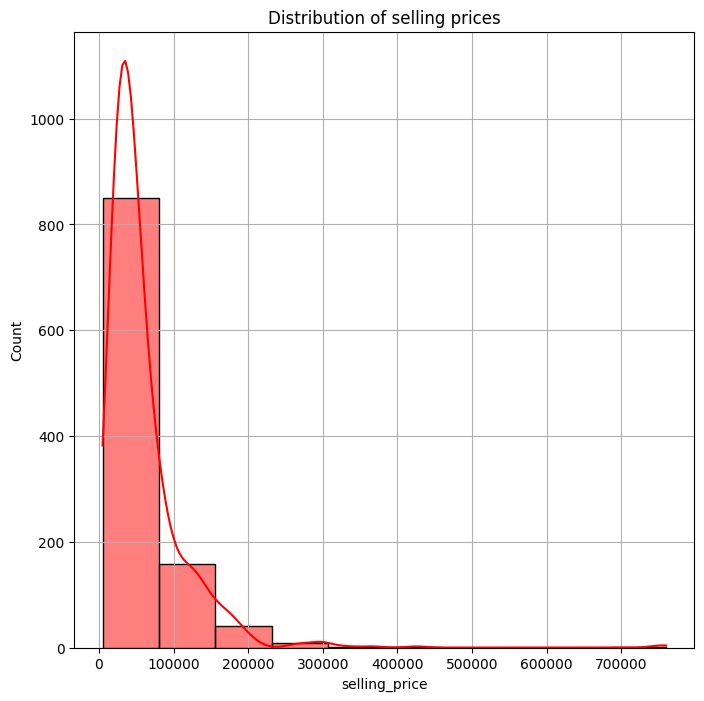

In [537]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
plt.figure(figsize=(8,8))
plt.title("Distribution of selling prices")
sns.histplot(df["selling_price"],kde=True,color='r',bins=10)
plt.grid()
plt.show()

## Observation
1. price data is Right Skewed
2. Price of Most of bikes is between 10,000 and 1,00,000
3. Outliers are present
4. Very few people are buying the bikes above 2,00,000 price

In [538]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.


In [539]:
df.groupby(df["seller_type"])["selling_price"].mean()

,selling_price
seller_type,
Dealer,46666.666667
Individual,59711.923223


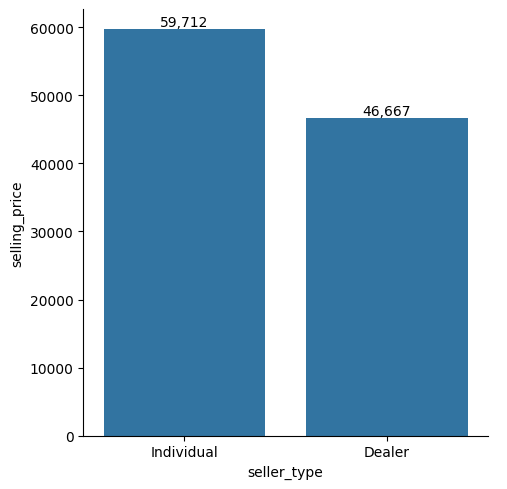

In [540]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(kind="bar",x="seller_type",y="selling_price",data=df,ci=None,estimator=np.mean)

# Add exact values on top of bars
for ax in g.axes.flat:   # iterate over all facets
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,  # center of the bar
            height,                          # y-coordinate = bar height
            f'{height:,.0f}',                # formatted label
            ha='center', va='bottom',        # center align
            fontsize=10, color='black'
        )

plt.show()


## Observation
- Individual sellers are selling bike at higher price than Dealers

In [541]:
# Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar
df.groupby(["owner"])["km_driven"].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


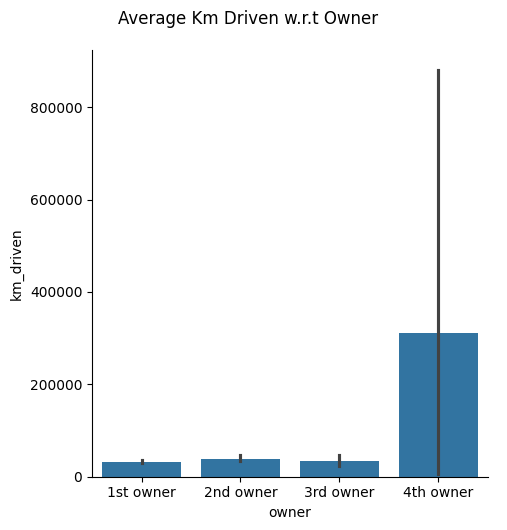

In [542]:
g = sns.catplot(kind="bar",x="owner",y="km_driven",data=df,estimator=np.mean)
g.fig.suptitle("Average Km Driven w.r.t Owner", y=1.05)  # add title
plt.show()


<Axes: ylabel='km_driven'>

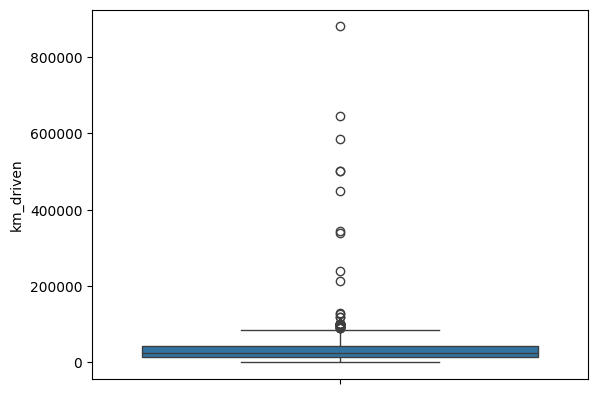

In [543]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
sns.boxplot(df["km_driven"])

In [544]:
df[["km_driven"]].describe().T

,count,mean,std,min,25%,50%,75%,max
km_driven,1061.0,34359.833176,51623.152702,350.0,13500.0,25000.0,43000.0,880000.0


In [545]:
# Outliers present

In [546]:
# removing the outliers
col="km_driven"
q1,q3=df[col].quantile([0.25,0.75])
iqr=(q3-q1)
upper=q3+(1.5* iqr)
lower=q1-(1.5*iqr)
df[col]=np.where(df[col]>upper,np.nan,np.where(df[col]<lower,np.nan,df[col]))


In [547]:
df.dropna(inplace=True)

<Axes: ylabel='km_driven'>

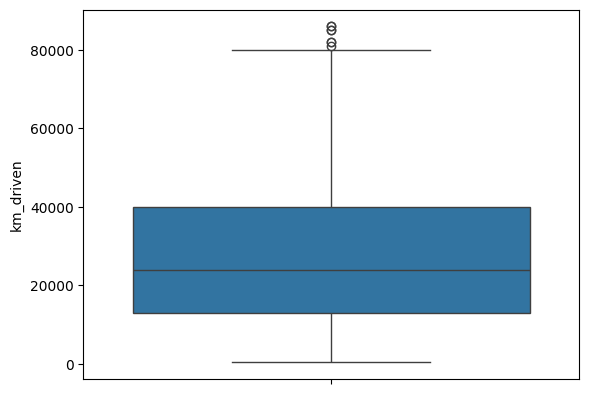

In [548]:
sns.boxplot(df["km_driven"])

In [549]:
df[["km_driven"]].describe().T

,count,mean,std,min,25%,50%,75%,max
km_driven,1022.0,28203.415851,19552.083583,350.0,13000.0,24000.0,40000.0,86000.0


In [550]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

<Axes: xlabel='year', ylabel='selling_price'>

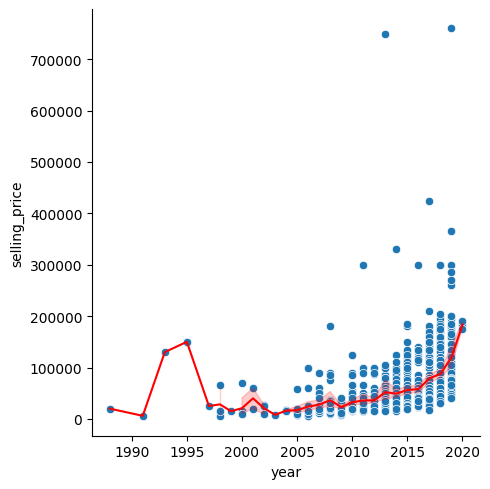

In [551]:
sns.relplot(kind="scatter",x="year",y="selling_price",data=df)
sns.lineplot(x="year",y="selling_price",data=df,c='r')

In [552]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

In [553]:
df["seller_type"].unique()

array(['Individual', 'Dealer'], dtype=object)

In [554]:
df["seller_type"].value_counts()

,count
seller_type,
Individual,1017
Dealer,5


In [555]:
from sklearn.preprocessing import OneHotEncoder
seller_encoder=OneHotEncoder()
seller_encoder

OneHotEncoder()

In [556]:
seller_type=seller_encoder.fit_transform(df[["seller_type"]]).toarray().astype('int')

In [557]:
pd.DataFrame(seller_type,columns=seller_encoder.get_feature_names_out(["seller_type"])).sample(10)

,seller_type_Dealer,seller_type_Individual
390,0,1
297,0,1
743,0,1
184,0,1
202,0,1
109,0,1
613,0,1
604,0,1
407,0,1
547,0,1


In [558]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

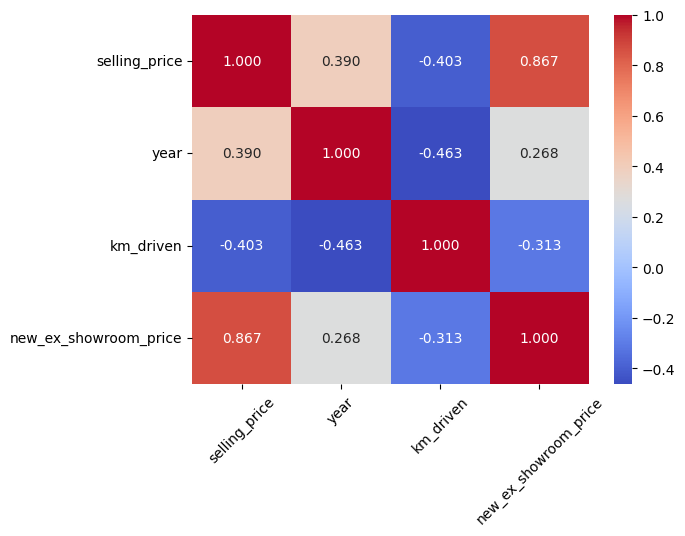

In [559]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt="0.3f",cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()

Selling Price and EX Showroom Price have the highest correlation

In [560]:
# Question 10: Summarize your findings in a brief report:
# ● What are the most important factors affecting a bike's selling price?
# ● Mention any data cleaning or feature engineering you performed.

### 1. What are the most important factors affecting a bike's selling price?
- The price of bike is most affected by its
    - [1.Selling price  >> 2.KM Driven >> 3.Year of Purchase.]

### 2. Mention any data cleaning or feature engineering you performed.

1. The ex_showroom_price data had many null values so i created a new feature new_ex_showroom_price  by category of selling price of bike based on the average of ex_showroom price every category.

2. The KM Driven col has 39 outliers so replace the Outliers with np.nan and remove them from the data


